# Assignment 4 (Week 4)


## Name: Theresa Louise Bazudde



In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

# Black code formatter (Optional)
%load_ext nb_black

<IPython.core.display.Javascript object>

#  Qs1

In [2]:
art = pd.read_csv("art.csv")

<IPython.core.display.Javascript object>

### Part a

In [3]:
art["Name"] = art["Artist"].str.split(",").apply(lambda x: x[0].strip())
art.Name.unique()

array(['Leonardo da Vinci', 'Rembrandt van Rijn', 'Artist Unknown',
       'Thomas Gainsborough', 'Georges Seurat', 'Jean-François Millet',
       'Itō Jakuchū', 'Katsushika Hokusai', 'Auguste Rodin',
       'Vincent van Gogh', 'Michelangelo',
       'Joseph Mallord William Turner', 'Hishikawa Moronobu',
       'Thomas Ridgeway Gould', 'Giuseppe Arcimboldo',
       'Sandro Botticelli', 'Arnold Böcklin', 'Thutmose', 'Édouard Manet',
       'Paul Cézanne', 'Johannes Vermeer', 'Tōshūsai Sharaku',
       'Pieter Brueghel the Elder', 'John Everett Millais',
       'Diego Velázquez', 'Francisco de Goya', 'Tawaraya Sōtatsu',
       'Eugène Delacroix'], dtype=object)

<IPython.core.display.Javascript object>

### Part b

In [4]:
art["Date"] = art["Artist"].str.split(",").apply(lambda x: x[1].strip())
art.Date.unique()

array(['circa 1487', '1642', '1000-400 BCE', '1770', 'circa 130 BCE',
       'circa 1885', '1857', '18th century', 'circa 1831', '1902',
       'circa 1503', 'circa 1888', 'circa 1504', '1839', '17th century',
       'circa 1883', '196 BCE', 'circa 1563', 'circa 1850',
       '5th century BCE', 'circa 1485', '1883', 'circa 1345 BCE', '1866',
       'circa 1899', 'circa 1882', 'circa 1658', '2nd century CE',
       'circa 1000 BCE', '1794', '1565', 'circa 1490', '1852',
       'circa 1656', '1200 BCE', '1889', 'circa 190 BCE', 'circa 1805',
       '210 BCE', 'circa 1665', '1830'], dtype=object)

<IPython.core.display.Javascript object>

### Part c

In [5]:
art["Art_type"] = art["Artist"].str.split(",").apply(lambda x: x[-1].strip())
art.Art_type.unique()

array(['Pen and ink on paper', 'Oil on canvas', 'Fired pottery', 'Marble',
       'Dyed silk', 'Woodblock print', 'Bronze', 'Oil on poplar',
       'Color on silk', 'Granodiorite', 'Tempura on canvas',
       'Oil on wood', 'circa 1345 BCE', 'andesite', 'Oil on wood panel',
       'Earthenware', 'Gold leaf and ink on paper'], dtype=object)

<IPython.core.display.Javascript object>

# Qs 2

In [6]:
df = pd.read_csv("Hotel Reservations.csv")
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

## Part a (i & ii)

In [7]:
class NumericTransformers:
    """
    This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector).
    """
    
    def __init__(self, df):
        self.df = df
        
    def sigmoid(self, x):
        """
        Apply a sigmoid function to a scalar value x
        """
        return 1 / (1 + np.exp(-x))
    
    def transform_sigmoid(self, col_names):
        """
        Transform the specified columns using a sigmoid function
        """
        for col_name in col_names:
            self.df[f"{col_name}_sigmoid"] = self.df[col_name].apply(lambda x: self.sigmoid(x))
    
    def transform_cube_root(self, col_names):
        """
        Transform the specified columns by taking the cube root of each value
        """
        for col_name in col_names:
            self.df[f"{col_name}_cbrt"] = self.df[col_name].apply(lambda x: np.cbrt(x))


# Create an instance of the NumericTransformers class
nt = NumericTransformers(df)

# Define the columns to transform
cols_to_transform = ['no_of_adults', 'arrival_month','no_of_special_requests']

# Apply the transformations to the specified columns
nt.transform_sigmoid(cols_to_transform)
nt.transform_cube_root(cols_to_transform)

# Create a new DataFrame with the transformed features
new_df = nt.df[['no_of_adults_sigmoid', 'no_of_adults_cbrt', 'arrival_month_sigmoid','arrival_month_cbrt',
                'no_of_special_requests_sigmoid', 'no_of_special_requests_cbrt']]

# Display the descriptive summary statistics for each transformation
print('Descriptive summary statistics for sigmoid transformation:')
print(new_df[['no_of_adults_sigmoid','arrival_month_sigmoid', 'no_of_special_requests_sigmoid']].describe())

print('')

print('Descriptive summary statistics for cube root transformation:')
print(new_df[['no_of_adults_cbrt', 'arrival_month_cbrt', 'no_of_special_requests_cbrt']].describe())


Descriptive summary statistics for sigmoid transformation:
       no_of_adults_sigmoid  arrival_month_sigmoid  \
count          36275.000000           36275.000000   
mean               0.852203               0.981613   
std                0.069484               0.050257   
min                0.500000               0.731059   
25%                0.880797               0.993307   
50%                0.880797               0.999665   
75%                0.880797               0.999955   
max                0.982014               0.999994   

       no_of_special_requests_sigmoid  
count                    36275.000000  
mean                         0.627820  
std                          0.149031  
min                          0.500000  
25%                          0.500000  
50%                          0.500000  
75%                          0.731059  
max                          0.993307  

Descriptive summary statistics for cube root transformation:
       no_of_adults_cbrt  arriva

<IPython.core.display.Javascript object>

## Part b

<AxesSubplot:>

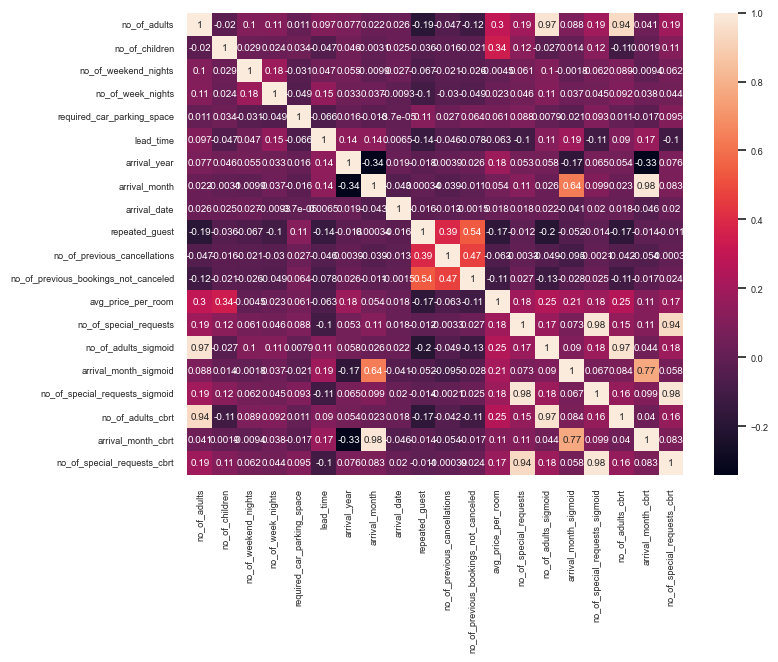

<IPython.core.display.Javascript object>

In [8]:
corr_matrix = df.corr()

# plot the heatmap
sns.set(rc={"figure.figsize": (8, 6)})
sns.set(font_scale=0.6)
sns.heatmap(corr_matrix, annot=True)

### Qs 3:

Given the string shown below

```python
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)
```
a.) Write a RegEx pattern that displays all the valid:

    i.) URLs

    ii.) phone numbers (11 or more digits)

b.) Given the array shown below:

```python
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))
```

i.) write a code that **normalizes** the array, `A` using:

$$
x_{new} = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}
$$

* Return the **descriptive statistics** of the normalized array.

ii.) Create **histogram** of the normalized array, `A`

In [9]:
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)

<IPython.core.display.Javascript object>

## Part a (i)

In [10]:
pattern = r"https?://\S+"

# find all matches
urls = re.findall(pattern, my_string)

# print the URLs
print(urls)

['https://zadarma.com/en/tariffs/numbers/united-states/mobile/', 'https://zadarma.com/en/tariffs/numbers/united-states/mobile/', 'https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link']


<IPython.core.display.Javascript object>

## Part a (ii)

In [11]:
pattern1 = r"(\+?\d{3,4}\s*\-*\s*\d{3,4}\s*\-*\s*\d{3,4}\s*\-*\s*\d*)"

phone = re.findall(pattern1, my_string)
print(phone)

['287 576 3098 ', '0808 576 8013', '814-300-8859 ']


<IPython.core.display.Javascript object>

## Part b

In [12]:
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))

<IPython.core.display.Javascript object>

### b(i)

In [13]:
A_norm = (A - np.min(A)) / (np.max(A) - np.min(A))

# descriptive statistics of the normalised array
print(pd.DataFrame(A_norm).describe())

               0          1          2          3          4
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.489447   0.546130   0.448717   0.397542   0.646515
std     0.289048   0.304508   0.271435   0.354210   0.333582
min     0.133545   0.007978   0.059527   0.022381   0.000000
25%     0.269679   0.365662   0.252205   0.114887   0.410454
50%     0.407325   0.549814   0.405082   0.330894   0.705488
75%     0.773544   0.807233   0.585977   0.518566   0.929375
max     0.909155   0.929447   0.919950   0.990693   1.000000


<IPython.core.display.Javascript object>

### b(ii)

(array([[0., 2., 1., 2., 1., 0., 0., 3., 0., 1.],
        [1., 0., 1., 2., 1., 0., 1., 1., 2., 1.],
        [1., 1., 1., 2., 1., 2., 0., 1., 0., 1.],
        [3., 0., 2., 0., 2., 1., 0., 0., 0., 2.],
        [1., 0., 0., 2., 0., 1., 1., 1., 1., 3.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 5 BarContainer objects>)

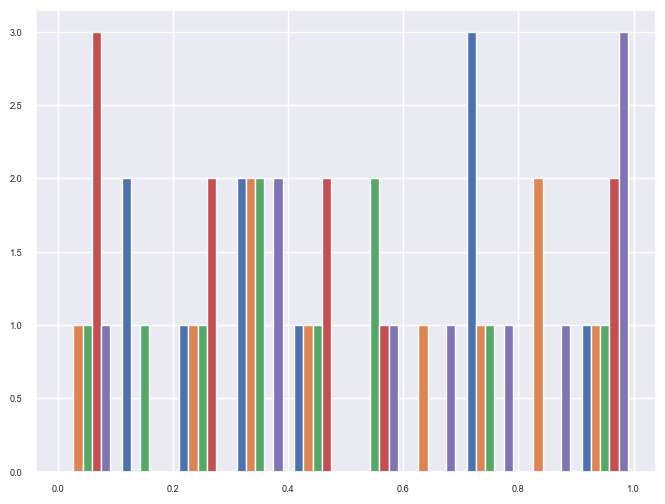

<IPython.core.display.Javascript object>

In [14]:
plt.hist(A_norm, bins=10)

### Qs 4

#### The data can be found [here](https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link)

a.) Clean the following columns: `price`, `SSD(GB)`, `warranty(years)`, `Display(inch)` \
Note: Return numerical values for the cleaned columns with the corresponding unit as the appended to the column name. \
e.g. \
SSD(GB) retuns: \
`512 GB HDD|512 GB SSD`: `512` \
The Display(inch) retuns: \
`38.1 cm (15 inch) Display`: `15`

* You might need to create **new columns** with the corresponding **column names**.
* **To validate your result, run**:

```python
df[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)
```

b.) 

i.) Create a new column called `RAM_type` which extract the type of RAM. \
e.g. \
`32 GB LPDDR5 RAM`: `LPDDR5`

ii.) Create a new column called `is_SSD` which checks whether the `SSD` storage is `SSD` or not. It returns True if it's an SSD storage otherwise, False.

c.) Using the approriate column, create an new column called `Brand_name` by extracting the brand names. Validate your result by displaying the unique values in `Brand_name`

In [15]:
df1 = pd.read_csv("laptops.csv")
df1.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Keyboard,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty


<IPython.core.display.Javascript object>

## Part a

In [16]:
df1 = df1[df1["SSD"].str.contains("SSD", case=False)]
ssd_pat = r"(\d+)\s*(?:GB|gb)"
df1["SSD_GB"] = df1["SSD"].str.extract(ssd_pat)
df1.SSD_GB.unique()

array(['256', '512', '128', nan], dtype=object)

<IPython.core.display.Javascript object>

In [17]:
dis_pat = r"(\d+(?:\.\d+)?)\s*inch.*Display"
df1["Display_inch"] = df1["Display"].str.extract(dis_pat)
df1.Display_inch.unique()

array(['14', nan, '15.6', '13.3', '17.3', '16', '16.2', '15', '14.1',
       '16.1', '14.2', '13.4', '14.5', '13.5', '13', '12'], dtype=object)

<IPython.core.display.Javascript object>

In [18]:
mask = df1["warranty"].str.contains("warranty", case=False, na=False)
df1["warranty"] = np.where(mask, df1["warranty"], np.nan)
df1.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,SSD_GB,Display_inch
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,256,14
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On,512,NaN
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,512,NaN
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,512,15.6
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7 Octa Core AMD R7-4800H - (8 GB/512 GB SSD/Windows 11 Ho...,"₹67,990","₹94,99028% off",AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,512,NaN


<IPython.core.display.Javascript object>

## Part b

### b(i)

In [19]:
ram_pattern = r"\b\d+\s*(?:GB|gb)\s+(\w+)\b"
df1["RAM_type"] = df1["RAM"].str.extract(ram_pattern)
df1.RAM_type.unique()

array(['DDR4', 'LPDDR4X', 'DDR5', 'LPDDR5', 'Unified', 'LPDDR4', 'DDR3',
       'LPDDR3', nan], dtype=object)

<IPython.core.display.Javascript object>

### b(ii)

In [20]:
df1["is_SSD"] = df1["SSD"].str.contains("SSD")
df1.is_SSD.unique()

array([ True])

<IPython.core.display.Javascript object>

## Part c

In [21]:
df1["Brand_name"] = df1["title"].str.split(" ").apply(lambda x: x[0].strip())
df1.Brand_name.unique()

array(['HP', 'Lenovo', 'ASUS', 'RedmiBook', 'acer', 'Infinix', 'APPLE',
       'MSI', 'DELL', 'SAMSUNG', 'GIGABYTE', 'Avita', 'Nokia', 'Vaio',
       'Mi', 'LG', 'realme', 'Ultimus'], dtype=object)

<IPython.core.display.Javascript object>